# Solución de sistemas de Ecuaciones lineales 
Usando Sympy

In [5]:
from sympy import *
from sympy import symbols, Eq, Function
from sympy.solvers.ode.systems import dsolve_system
from sympy.plotting import plot

dsolve_system(eqs)

init_printing(use_unicode=True)

f, g = symbols("f g", cls=Function)

x = symbols("x")

In [7]:
eqs = [Eq(f(x).diff(x), g(x)), Eq(g(x).diff(x), f(x))]

dsolve_system(eqs)


In [8]:

dsolve_system(eqs, ics={f(0): 1, g(0): 0})

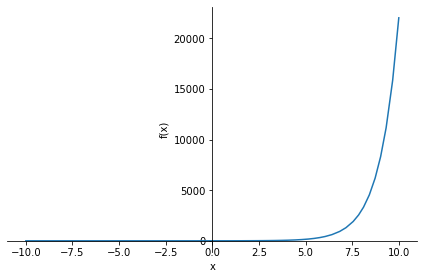

In [9]:
plot(0.5*(exp(x)+exp(-x))

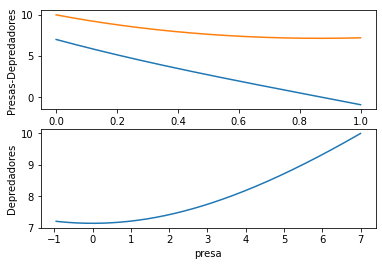

/tmp/ipykernel_186546/3031059629.py:67: RuntimeWarning: invalid value encountered in true_divide
  uu = uu / norm
/tmp/ipykernel_186546/3031059629.py:68: RuntimeWarning: invalid value encountered in true_divide
  vv = vv / norm


TypeError: 'function' object is not subscriptable

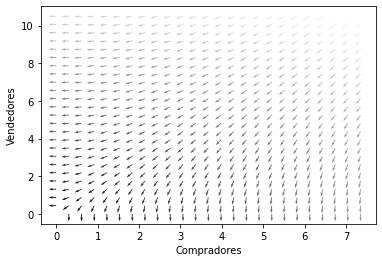

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.html.widgets import interact 
from IPython.html.widgets import interactive
import random as ra


'''
def df_dt(x, t,a1,a2):
    ## coexistencia
    P=np.array([[1,1],[1,-1]])
    iP=np.linalg.inv(P)
    L=np.array([[a1,0],[0,a2]])
    A=P@L@iP
    dx=A[0,0]*x[0]+A[0,1]*x[1]
    dy=A[1,0]*x[0]+A[1,1]*x[1]
    return np.array([dx,dy])

def Ma(a1=-2,a2=-1):
    P=np.array([[1,1],[1,-1]])
    iP=np.linalg.inv(P)
    L=np.array([[a1,0],[0,a2]])
    A=P@L@iP
    return A
A=Ma
'''
# Condiciones iniciales
x0 = 7   # Compradores
y0 = 10    # Vendedores
conds_iniciales = np.array([x0, y0])
# Condiciones para integración
a1=-1
a2=1
tf = 1
N = 800
t = np.linspace(0, tf, N)
X = odeint(df_dt, conds_iniciales, t,args=(a1,a2))


fig,ax=plt.subplots(2,1)

ax[0].plot(t, X[:, 0], label='presa')
ax[0].plot(t, X[:, 1], label='depredador')
ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('Presas-Depredadores')
#ax[0].rcParams["figure.figsize"] = (10,10)


ax[1].plot(X[:, 0],X[:, 1], label='presa')
ax[1].set_xlabel('presa')
ax[1].set_ylabel('Depredadores')
#ax[1].rcParams["figure.figsize"] = (10,10)
plt.show()





x_max = np.max(X[:,0]) * 1.05
y_max = np.max(X[:,1]) * 1.05
x = np.linspace(0, x_max, 25)
y = np.linspace(0, y_max, 25)
xx, yy = np.meshgrid(x, y)
uu, vv = df_dt((xx, yy), 0,a1,a2)
norm = np.sqrt(uu**2 + vv**2)
uu = uu / norm
vv = vv / norm
plt.quiver(xx, yy, uu, vv, norm, cmap=plt.cm.gray)
plt.xlabel('Compradores')
plt.ylabel('Vendedores')
np.random.seed(5)
#for n in range(10):
#  conds_iniciales=25*np.random.rand(2)
#  X = odeint(df_dt, conds_iniciales, t, args=(a, b, c, d))
y1=(1.0/A[0][2])*(A[0][0]-A[0][1]*x)
y2=(1.0/A[1][2])*(A[1][0]-A[1][1]*x)
s=np.logical_and(0<y1,y1<y_max)
yy1=y1[s]
xx1=x[s]
s=np.logical_and(0<y2,y2<y_max)
yy2=y2[s]
xx2=x[s]
s1=np.logical_and(0<X[:, 1],X[:, 1]<y_max)
s2=np.logical_and(0<X[:, 0],X[:, 0]<y_max)
s=np.logical_and(s1,s2)

plt.plot(X[:, 0], X[:, 1])
conds_iniciales= np.array([1, 1])
  
X = odeint(df_dt, conds_iniciales, t, args=(a1,a2))
plt.plot(xx1,yy1,'r')
plt.plot(xx2,yy2,'r')
s1=np.logical_and(0<X[:, 1],X[:, 1]<y_max)
s2=np.logical_and(0<X[:, 0],X[:, 0]<y_max)
s=np.logical_and(s1,s2)
plt.plot(X[s, 0], X[s, 1])
plt.rcParams["figure.figsize"] = (10,10)
plt.show()
len(xx1)